In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score,classification_report
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier

In [57]:
anime=pd.read_csv('anime.csv')
ratings=pd.read_csv('rating.csv.zip')

print(anime.head())
print(ratings.head())

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  
   user_id  anime_id  rating
0        1        20      -1
1        1        24      -1
2        1        79      -1
3        1       226      -1
4

In [58]:
anime.tail()
ratings.tail()

,user_id,anime_id,rating
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9
7813736,73516,8074,9


In [59]:
anime.info
ratings.info

<bound method DataFrame.info of          user_id  anime_id  rating
0              1        20      -1
1              1        24      -1
2              1        79      -1
3              1       226      -1
4              1       241      -1
...          ...       ...     ...
7813732    73515     16512       7
7813733    73515     17187       9
7813734    73515     22145      10
7813735    73516       790       9
7813736    73516      8074       9

[7813737 rows x 3 columns]>

In [60]:
ratings.describe()
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [61]:
anime.shape
ratings.shape

(7813737, 3)

In [82]:
anime.columns
ratings.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [63]:
ratings.isnull().sum()
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [64]:
#REMOVING USERS WHO HAVE WATCHED ANIME BUT DIDN'T RATE THEM
ratings=ratings[ratings['rating']!=-1]
ratings

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [65]:
#HANDLING MISSING VALUES
anime['genre'].fillna('Unknown',inplace=True)
anime['type'].fillna('Unknown',inplace=True)
anime['rating'].fillna(anime['rating'].mean(),inplace=True)
anime.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

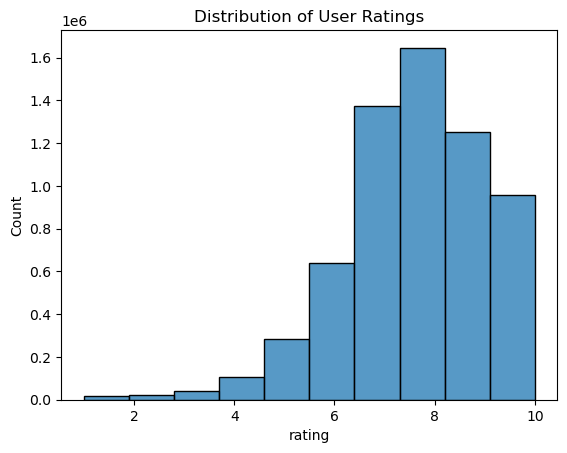

In [66]:
#DISTRIBUTION - RATINGS
#EACH BAR SHOWING HOW MANY USERS GAVE A PARTICULAR RATING RANGE
plt.figure() #new plot/figure
sns.histplot(ratings['rating'],bins=10)
plt.title('Distribution of User Ratings')
plt.show()

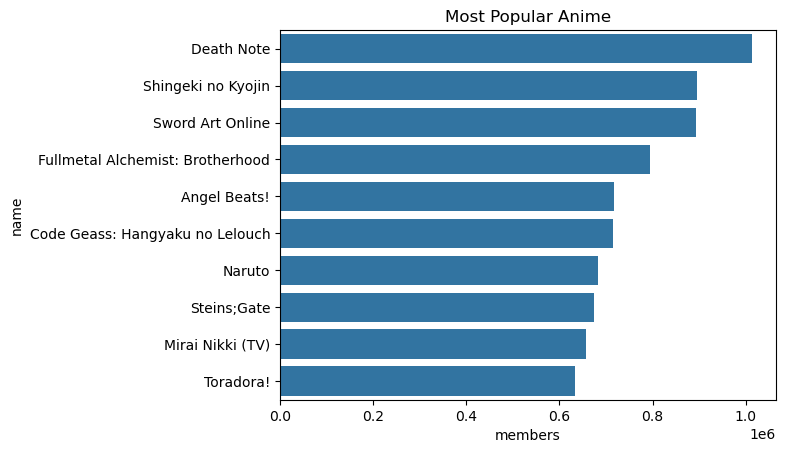

In [67]:
#POPULAR ANIME BASED ON THE NUMBER OF MEMBERS - higher the number more popular the anime and more chances of it being watched or rated (making members the independent variable in this project after merging)
top_anime=anime.sort_values(by='members',ascending=False).head(10)
plt.figure()
sns.barplot(x=top_anime['members'],y=top_anime['name'])
plt.title('Most Popular Anime')
plt.show()

In [68]:
#MERGING DATASETS
merged_df=ratings.merge(anime,on='anime_id')
merged_df=merged_df[['user_id','anime_id','rating_x','members']] #selecting required columns
merged_df.rename(columns={'rating_x':'user_rating'},inplace=True) #for readability
print(merged_df.head())

   user_id  anime_id  user_rating  members
0        1      8074           10   535892
1        1     11617           10   398660
2        1     11757           10   893100
3        1     15451           10   266657
4        2     11771           10   338315


In [69]:
#TRAIN-TEST SPLIT
x=merged_df.drop(['user_rating'],axis=1)
y=merged_df['user_rating']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [70]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [71]:
pred=model.predict(x_test)
print('MSE:',mean_squared_error(y_test,pred))
print('Score:',model.score(x_test,y_test))
rmse_lr=np.sqrt(mean_squared_error(y_test,pred))
print('Linear Regression RMSE:',rmse_lr)
print('R2 Score:',r2_score(y_test,pred))

MSE: 2.3361043635400596
Score: 0.05359310242022963
Linear Regression RMSE: 1.5284319950655507
R2 Score: 0.05359310242022963


In [72]:
dt_reg=DecisionTreeRegressor(max_depth=5)
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [73]:
pred_dt=dt_reg.predict(x_test)
print('MSE:',mean_squared_error(y_test,pred_dt))
print('R2 Score:',r2_score(y_test,pred_dt))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred_dt)))
print('Score:',dt_reg.score(x_test,y_test))

MSE: 2.264535665374169
R2 Score: 0.08258714508892384
RMSE: 1.5048374215755564
Score: 0.08258714508892384


In [74]:
#CREATE A BINARY TARGET - to distinguish classification
merged_df['liked']=merged_df['user_rating'].apply(lambda x:1 if x>=7 else 0)
merged_df

,user_id,anime_id,user_rating,members,liked
0,1,8074,10,535892,1
1,1,11617,10,398660,1
2,1,11757,10,893100,1
3,1,15451,10,266657,1
4,2,11771,10,338315,1
...,...,...,...,...,...
6337234,73515,16512,7,101266,1
6337235,73515,17187,9,31747,1
6337236,73515,22145,10,122895,1
6337237,73516,790,9,265005,1


In [75]:
#train_test
x=merged_df.drop(['liked'],axis=1)
y=merged_df['liked']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [76]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [77]:
lg_pred=log_reg.predict(x_test)
print('Accuracy:',accuracy_score(y_test,lg_pred))
print(classification_report(y_test,lg_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    221460
           1       1.00      1.00      1.00   1045988

    accuracy                           1.00   1267448
   macro avg       1.00      1.00      1.00   1267448
weighted avg       1.00      1.00      1.00   1267448



In [78]:
#User Anime Matrix
from scipy.sparse import csr_matrix
user_anime_matrix =csr_matrix((merged_df['user_rating'],(merged_df['user_id'],merged_df['anime_id'])))

In [ ]:
#csr_matrix stores only non-zero values instead of storing millions of zeroes saving huge m/y:Compressed Sparse Row
#here user_rating values and taken and given to (user_id,anime_id)
#csr_matrix((data,(row_indices,column_indices))) ;ie, create a matrix where value='user_rating' placed at row='user_id' and column='anime_id'

In [ ]:
#creating a user-anime matrix since the data that we have now is having a 
#long format more like a list format but to apply the recommendation algorithm
#we need the data in a matrix format.

#pivot_table() - reshapes the dataset from rows into a matrix format
#index=user_id - rows represent users
#columns=anime_id - column represents anime items
#values=user_rating - cell value =  rating given by user to that anime
#fillna(0) - replace missing rating by 0 (no interaction btw the user and anime)

#matrix for calculating user similarity ; build collaborative filtering ; power knn-based recommendation sys:


#“This step creates a user–item interaction matrix where rows represent users,
#columns represent anime, and values represent ratings. Missing ratings are 
#filled with zero to indicate no interaction. This matrix is essential for 
#collaborative filtering and similarity-based recommendation systems.”

#This step prepares the data for recommendations
#Without this, we cannot recommend anime
#This is the heart of the recommender system

In [79]:
knn=NearestNeighbors(metric='cosine',algorithm='brute')
knn.fit(user_anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [88]:
def recommend_anime(user_id,n_recommendations=5):
    user_vector=user_anime_matrix[user_id]
    distances,indices=knn.kneighbors(user_vector,n_neighbors=n_recommendations+1)
    similar_users=indices[0][1:]
    mean_ratings=user_anime_matrix[similar_users].mean(axis=0)
    mean_ratings=mean_ratings.A1
    watched=user_anime_matrix[user_id].nonzero()[1]
    mean_ratings[watched]=0
    top_anime_idx=mean_ratings.argsort()[::-1][:n_recommendations]
    return anime[anime['anime_id'].isin(top_anime_idx)][['name','genre']]


#SHOW ANIME RATING FUNCTION 
def show_anime_ratings(anime_name):
    #find anime_id
    if anime_name is None or anime_name.strip()==" ":
        return "Please enter an anime name"
    anime_name=anime_name.strip().lower()
    #find anime_id from anime_df since merged doesnot have any
    anime_row=anime[anime['name'].str.lower()==anime_name]
    # anime_data=merged_df[merged_df['name'].str.lower()==anime_name.lower()]
    if anime_row.empty:
        return "Anime not found in dataset"
    anime_id=anime_row.iloc[0]['anime_id']

    #get ratings from merged_df
    ratings_data=merged_df[merged_df['anime_id']==anime_id]
    if ratings_data.empty:
        return 'No ratings available for this anime'
    avg_rating=ratings_data['user_rating'].mean()
    rating_count=ratings_data['user_rating'].count()
    
    # anime_row=anime[anime['name'].str.contains(anime_name,case=False,na=False)]
    # if anime_row.empty:
    #     return 'Anime not found!'
        
    # anime_id=anime_row.iloc[0]['anime_id']
    # full_name=anime_row.iloc[0]['name']
    # #get ratings
    # ratings_data=merged_df[merged_df['anime_id']==anime_id]
    # if ratings_data.empty:
    #     return f'No ratings available for {full_name}'
    return (f"Anime:{anime_row.iloc[0]['name']}\n",  
            f"Number of ratings:{rating_count}\n",
            f"Average rating:{avg_rating:.2f}")

   

### UI

In [42]:
pip install gradio


   ---------------------------------------- 0.0/24.2 MB ? eta -:--:--
   - -------------------------------------- 0.8/24.2 MB 7.1 MB/s eta 0:00:04
   --- ------------------------------------ 1.8/24.2 MB 5.7 MB/s eta 0:00:04
   ----- ---------------------------------- 3.4/24.2 MB 6.0 MB/s eta 0:00:04
   -------- ------------------------------- 5.2/24.2 MB 6.7 MB/s eta 0:00:03
   ----------- ---------------------------- 6.8/24.2 MB 7.0 MB/s eta 0:00:03
   ------------- -------------------------- 8.4/24.2 MB 7.3 MB/s eta 0:00:03
   ---------------- ----------------------- 10.0/24.2 MB 7.2 MB/s eta 0:00:02
   -------------------- ------------------- 12.3/24.2 MB 7.7 MB/s eta 0:00:02
   ------------------------- -------------- 15.2/24.2 MB 8.4 MB/s eta 0:00:02
   ----------------------------- ---------- 18.1/24.2 MB 9.0 MB/s eta 0:00:01
   ---------------------------------- ----- 21.0/24.2 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------  24.1/24.2 MB 9.9 MB/s eta 0:00:01

In [89]:
import gradio as gr
with gr.Blocks() as demo:
    gr.Markdown('### Anime Recommender System')

    #ANIME RATING
    with gr.Tab('Anime Ratings'):
        anime_input=gr.Textbox(label='Anime Name')
        anime_output=gr.Textbox(label='Ratings Info')
        gr.Button('Show Ratings').click(fn=show_anime_ratings,inputs=anime_input,outputs=anime_output)

    #RECOMMENDATIONS
    with gr.Tab('Recommendations'):
        user_input=gr.Number(label='User ID')
        rec_output=gr.Textbox()
        gr.Button('Get Recommendations').click(recommend_anime,inputs=user_input,outputs=rec_output)
demo.launch()

* Running on local URL:  http://127.0.0.1:7869
* To create a public link, set `share=True` in `launch()`.


In [35]:
recommend_anime(user_id=0,n_recommendations=5)

,name,genre
13,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ..."
19,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super..."
466,Suzumiya Haruhi no Yuuutsu,"Comedy, Mystery, Parody, School, Sci-Fi, Slice..."
1123,Kore wa Zombie Desu ka?,"Action, Comedy, Ecchi, Harem, Magic, Supernatural"
1338,Fate/stay night,"Action, Fantasy, Magic, Romance, Supernatural"


In [37]:
user_anime_matrix.shape

(73517, 34476)

In [39]:
recommend_anime(user_id=10)

,name,genre
841,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P..."
1976,Koutetsujou no Kabaneri,"Action, Drama, Fantasy, Horror"
11106,Yami Shibai 4th Season,"Dementia, Horror, Supernatural"


In [83]:
merged_df.columns

Index(['user_id', 'anime_id', 'user_rating', 'members', 'liked'], dtype='object')